In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy

In [2]:
data = pd.read_csv('1hm.csv')

In [3]:
# top country
data['GEO'].describe()

count     14999
unique        9
top          UK
freq       1772
Name: GEO, dtype: object

In [4]:
#avar step
data[(data['GEO']=='France')&(data['Gender']=='M')]['Sensor_StepCount'].mean()


3414.3774680603947

In [5]:
#labled text

newdata=data.copy()
newdata=newdata.drop(['ID'], axis=1)
category = newdata.columns[newdata.dtypes == 'object'][1:]
le=LabelEncoder()
for col in category:
    newdata[col] =le.fit_transform(newdata[col])


In [6]:
#pearson
pirs=newdata.corr(method='pearson', min_periods=1)
k=0
for i in pirs:
    pirs[i][k]=0
    k=k+1

print(pirs.max()[pirs.max()==pirs.max().max()])

print(pirs.min()[pirs.min()==pirs.min().min()])

Percent_Remote     0.897223
last_evaluation    0.897223
dtype: float64
Emp_Role    -0.770815
Men_Leave   -0.770815
dtype: float64


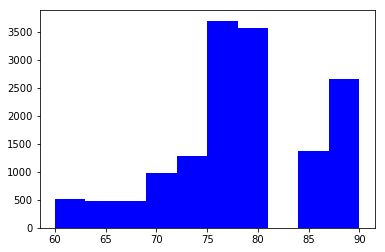

In [7]:
plt.hist(data['Sensor_Heartbeat(Average/Min)'], color='blue')
plt.show()

In [8]:
#data[data['Sensor_Heartbeat(Average/Min)']>numpy.percentile(data['Sensor_Heartbeat(Average/Min)'], q=95.)]['Role'].describe()

In [9]:
high_heartbeat=data[data['Sensor_Heartbeat(Average/Min)']>numpy.percentile(data['Sensor_Heartbeat(Average/Min)'], q=95.)]['Role']
Role=pd.DataFrame(data=data['Role'].drop_duplicates( keep='first', inplace=False), index=data['Role'].drop_duplicates( keep='first', inplace=False), columns=['heart'])

for empl in Role.index:
    Role['heart'][empl]=len(high_heartbeat[high_heartbeat==empl])/len(data[data['Role']==empl])
Role[Role['heart']==Role['heart'].max()]

heart
Role           
VP    0.0727273